#  Simply replace the string of raw_query_string with your search result and run the notebook :)


In [ ]:
raw_query_string = "software engineer"
query_in_url = '+'.join(raw_query_string.split())
query_in_url

'software+engineer'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
from io import StringIO 

---

## How many open positions are there?

At the time of implementation, number of jobs is included in a string above results, saying "Page x of y jobs". My idea is to extract the number in the given string.

In [ ]:
import bs4
from urllib.request import urlopen
url = 'https://www.indeed.com/jobs?q='+query_in_url+'&l='
indeed_source = urlopen(url).read().decode('utf-8')
soup = bs4.BeautifulSoup(indeed_source, 'html.parser')

In [ ]:
def get_count():
    phrase_extract = soup.find(id="searchCountPages")
    split = phrase_extract.text.split(' ')
    num_ind = split.index('jobs')
    return split[num_ind-1].replace(',',"")

In [ ]:
print("This is the total number of results with the given query: " + str(get_count()))

This is the total number of results with the given query: 87079


In [ ]:
def get_soup(url):
    indeed_source = urlopen(url).read().decode('utf-8')
    soup = bs4.BeautifulSoup(indeed_source, 'html.parser')
    return soup

In [ ]:
def extract_ad(url): 
    ads = []
    soup = get_soup(url)
    spans = soup.findAll('div', attrs={'class': 'summary'})
    for span in spans:
        ads.append(span.get_text())
    text = " ".join(ads)
    return text

In [ ]:
page_url = 'https://www.indeed.com/jobs?q='+ query_in_url + '&start=0'
print(page_url)
extract_ad(page_url)

https://www.indeed.com/jobs?q=software+engineer&start=0


'\n\nOngoing training and mentoring with senior-level software developers.\n40 weeks hands-on software development experience with real Techtonic customers.\n \n\nExcellent written and oral communication skills.\nWP Engine powers digital experiences for over 150,000 customers in 140 countries.\n \n\nThe qualified candidate will be mentored by experienced software engineers and learn Agile methodologies, web development best practices, Java Enterprise…\n \n\nThe position of Software Engineer will be responsible for designing, programming, coding, and analyzing new computer programs and data structures in accordance…\n \n\nCode high-volume and scalable software.\nWe have opportunities in a wide range of areas including development, design, search, platform, test, quality, big data,…\n \n\nFamiliarity with version control software (Git, Mercurial).\nFamiliarity with secure software development practices (Fortify).\nJS or React), HTML, and CSS.\n \n\nWe believe that improved access to insu

In [ ]:
def extract_title(url): 
    titles = []
    soup = get_soup(url)
    spans = soup.findAll('h2', attrs={'class': 'title'})
    for span in spans:
        titles.append(span.get_text())
    text = " ".join(titles)
    return text
page_url = 'https://www.indeed.com/jobs?q='+ query_in_url + '&start=0'
print(page_url)
extract_title(page_url)

https://www.indeed.com/jobs?q=software+engineer&start=0


'\n\nPAID Software Development Apprenticeship - Omaha, NE\n \n\nSoftware Engineer Internship\nnew \n\nEntry Level Software Engineer\n \n\nSoftware Engineer, Job Ref # 715913\nnew \n\nSoftware Engineer Intern\n \n\nAssociate Engineer Software\n \n\nSoftware Engineer\n \n\nSoftware Engineer\n \n\nSoftware Engineer (All Levels)\n \n\nSoftware Engineer\n \n\nSoftware Engineer\n \n\nSoftware Engineer (Entry-Level)\n \n\nJunior Software Engineer - ETL\n \n\nSoftware Engineer, Intern/Co-op\n \n\nAssociate Software Engineer\nnew'

In [ ]:
def extract_location(url): 
    locations = []
    soup = get_soup(url)
    locs = soup.findAll('span', {'class': 'location'})
    for loc in locs:
        if loc.text != 'United States' and loc.text != 'Remote':
            locations.append(loc.text)
    return(locations)

In [ ]:
import time
ad_list = []
title_list = []
loc_list = []
for i in range(1,200):
    ads = []
    base = 'https://www.indeed.com/jobs?q='+ query_in_url + '&start='
    url = base + str(i*10)
    ad_list.append(extract_ad(url))
    title_list.append(extract_title(url))
    loc_list += (extract_location(url))
    time.sleep(1)
ad_list

['\n\nFive (5) years of experience is required.\nRelated Server Engineer: 5 years (Required).\nCreate project plans for all system deployment and modifications and…\n \n\nAbility to obtain a DoD secret clearance.\nWe have implemented extensive policies and procedures, including mandatory use of face masks, social distancing in a…\n \n\nThis position will collaborate with other IT team members and business partners to build solutions based on industry best practices that meet or exceed the…\n \n\nSolid knowledge of software development methodologies and best practices.\nUnderstanding of distributed systems and message-driven service oriented architecture.\n \n\nMinimum of 5 years experience with IT support.\nDirect and support implementation of software and hardware upgrades.\nCreate VPN connections to customer sites.\n \n\n5 - 10+ years of experience in Data/Databases.\nReviews, evaluates, designs, implements and maintains Oracle and PostgreSQL database(s) Implement and maintain…\n \n\

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

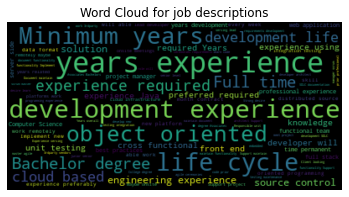

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(raw_query_string.split())
text = " ".join(ad_list)
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for job descriptions")
plt.show()

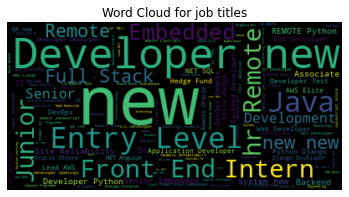

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(raw_query_string.split())
text = " ".join(title_list)
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for job titles")
plt.show()

**c)** From the previously collected results, retrieve the job offers' location information and represent the 10 most frequent cities with a bar plot! Filter the "United States" and "Remote" locations from the results, look for cities only!

(Hint: You can find the necessary information in the "location" HTML-tag.)

In [ ]:
city_state = [' '.join(x.split()[:2]) for x in loc_list]
loc_df = pd.DataFrame({'loc':city_state})
loc_df.head()

,loc
0,"Omaha, NE"
1,"Seattle, WA"
2,"Dallas, TX"
3,"Pierre, SD"
4,"East Lansing,"


In [ ]:
loc_df

,loc
0,"Omaha, NE"
1,"Seattle, WA"
2,"Dallas, TX"
3,"Pierre, SD"
4,"East Lansing,"
...,...
910,California
911,"Reston, VA"
912,"New York,"
913,"Plano, TX"


In [ ]:
loc_df['freq'] = loc_df.groupby('loc')['loc'].transform('count')
loc_df = loc_df.drop_duplicates()

In [ ]:
loc_df.sort_values(by='freq', ascending=False, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


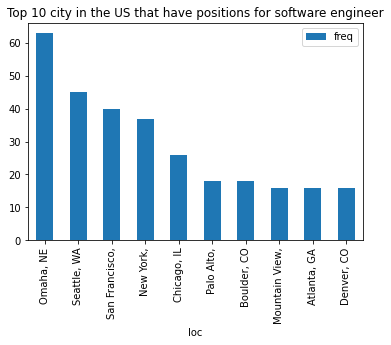

In [ ]:
loc_df[:10].plot(x = "loc", y = "freq", kind = "bar")
plt.title("Top 10 city in the US that have positions for "+raw_query_string)
plt.show()